# Measurement of memory usage in MATLAB user functions ver. 1.0

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import re
from datetime import datetime, timedelta

In [9]:
def create_df(fname_prefix, test_values, fname_postfix=''):
    regex_time = re.compile('top - ([0-9]*:[0-9]*:[0-9]*)')
    df = []
    for value in test_values:
        fname = fname_prefix + value + fname_postfix + '.log'
        try:
            with open(fname) as file:
                lines = file.readlines()
        except FileNotFoundError:
            continue

        vrt = []
        res = []
        times = []
        for line in lines:
            line = line.rstrip()
            
            if re.search('^top -', line):
                m = regex_time.search(line)
                tm = m.group(1)
            elif re.search('MATLAB', line):
                t = line.split()
                v = t[4]
                r = t[5]
                try:
                    # bytes
                    v = float(v) / 10**6
                except ValueError:
                    if re.search('g', v):
                        v = float(v.rstrip('g')) * 10**3
                    elif re.search('m', v):
                        v = float(v.rstrip('m'))
                    elif re.search('t', v):
                        v = float(v.rstrip('t')) * 10**6

                try:
                    # bytes
                    r = float(r) / 10**6
                except ValueError:
                    if re.search('g', r):
                        r = float(r.rstrip('g')) * 10**3
                    elif re.search('m', r):
                        r = float(r.rstrip('m'))
                    elif re.search('t', r):
                        r = float(r.rstrip('t')) * 10**6

                times.append(tm)
                vrt.append(v)
                res.append(r)

#         print(len(times))
#         print(len(vrt))
#         print(len(res))
        df.append(pd.DataFrame.from_dict({'time': times, 'virt': vrt, 'res': res}))
#         print(df)
        df[-1]['time'] = pd.to_datetime(df[-1]['time'])
        df[-1]['elapsed_time'] = pd.to_timedelta(df[-1]['time'] - df[-1]['time'][0]) / timedelta(seconds=1)
    return df

In [37]:
dataframes = {}
test_values = {}
log_dir = '../memory-usage/'

In [38]:
cmap = cm.get_cmap('tab10')

## Memory usage plots in load3DImage_uint16

In [39]:
test_values['load3DImage_uint16'] = ['500','1000','1500','2000','2500','3000']
dataframes['load3DImage_uint16'] = \
    create_df(log_dir+'top-load3DImage_uint16-xy-', test_values['load3DImage_uint16'], '-z-250')

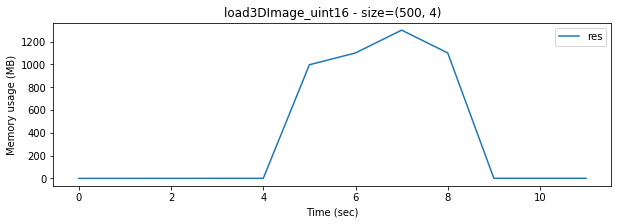

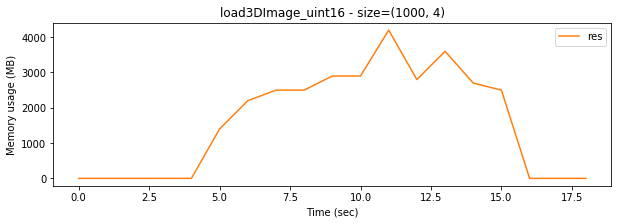

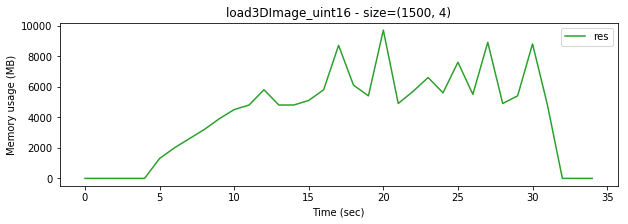

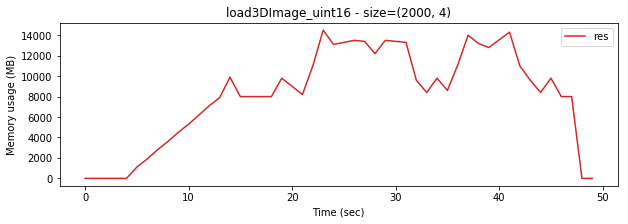

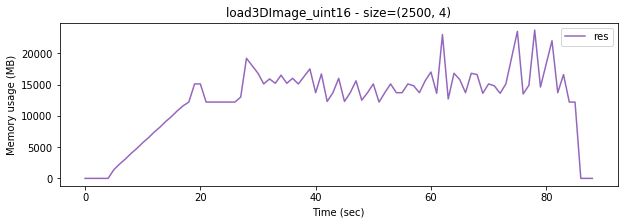

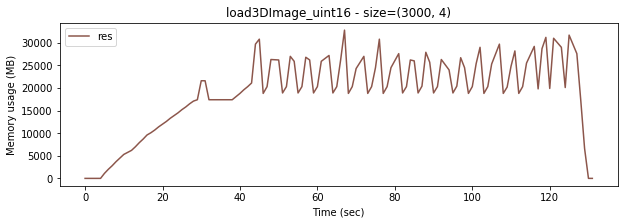

In [16]:
for i in range(0, len(dataframes['load3DImage_uint16'])):
    fig = dataframes['load3DImage_uint16'][i].plot(x='elapsed_time', y='res', figsize=(10,3), color=cmap.colors[i])
    fig.set_title('load3DImage_uint16 - size=(%s, 4)' % test_values['load3DImage_uint16'][i])
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [69]:
max_list = [col['res'].max()/1000 for col in dataframes['load3DImage_uint16']]
df1 = pd.DataFrame({'test values': test_values['load3DImage_uint16'], 'max': max_list})
df1['test values'] = pd.to_numeric(df1['test values'])
df1['output data size'] = df1['test values']**2*250*8/10**9
df1['x'] = df1['output data size']
df1['1.6x output data size'] = df1['output data size']*1.6
df1['1.8x output data size'] = df1['output data size']*1.8
df1['2x output data size'] = df1['output data size']*2

Text(0,0.5,'Max memory usage (GB)')

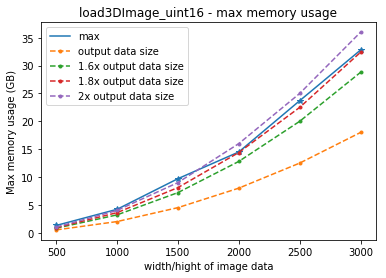

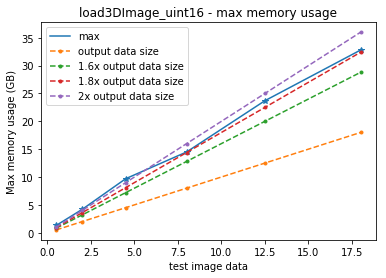

In [75]:
fig = df1.plot(x='test values', y='max', style='*-')
fig = df1.plot(x='test values', 
              y=['output data size','1.6x output data size','1.8x output data size','2x output data size'],
              style='.--', ax=fig)

fig.set_title('load3DImage_uint16 - max memory usage')
fig.set_xlabel('width/hight of image data')
fig.set_ylabel('Max memory usage (GB)')

fig = df1.plot(x='x', y='max', style='*-')
fig = df1.plot(x='x', 
              y=['output data size','1.6x output data size','1.8x output data size','2x output data size'],
              style='.--', ax=fig)

fig.set_title('load3DImage_uint16 - max memory usage')
fig.set_xlabel('test image data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in save3DImage_uint16

In [41]:
test_values['save3DImage_uint16'] = ['500','1000','1500','2000','2500','3000']
dataframes['save3DImage_uint16'] = \
    create_df(log_dir+'top-save3DImage_uint16-xy-', test_values['save3DImage_uint16'], '-z-250')

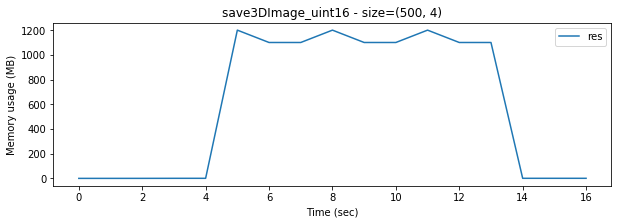

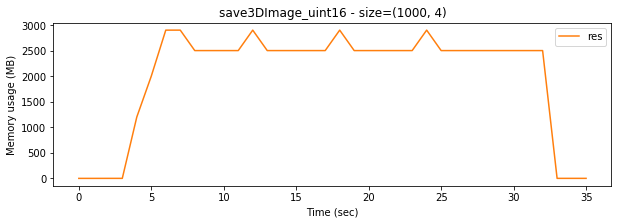

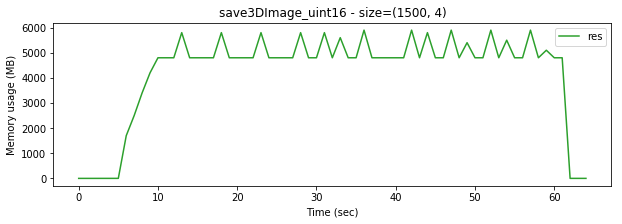

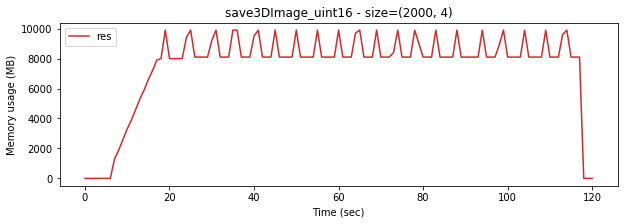

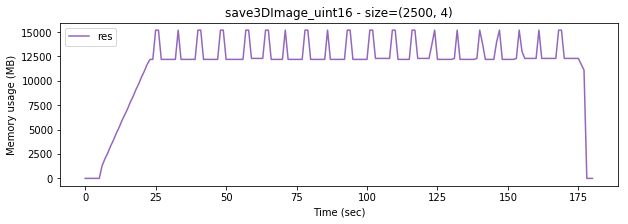

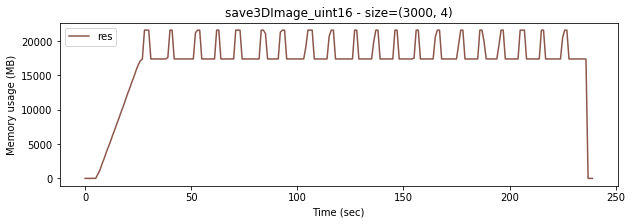

In [42]:
for i in range(0, len(dataframes['save3DImage_uint16'])):
    fig = dataframes['save3DImage_uint16'][i].plot(x='elapsed_time', y='res', figsize=(10,3), color=cmap.colors[i])
    fig.set_title('save3DImage_uint16 - size=(%s, 4)' % test_values['save3DImage_uint16'][i])
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [65]:
max_list = [col['res'].max()/1000 for col in dataframes['save3DImage_uint16']]
df2 = pd.DataFrame({'test values': test_values['save3DImage_uint16'], 'max': max_list})
df2['test values'] = pd.to_numeric(df2['test values'])
df2['input data size'] = df2['test values']**2*250*8/10**9
df2['x'] = df2['input data size']
df2['1.2x input data size'] = df2['input data size']*1.2
df2['1.25x input data size'] = df2['input data size']*1.25
df2['1.3x input data size'] = df2['input data size']*1.3

Text(0,0.5,'Max memory usage (GB)')

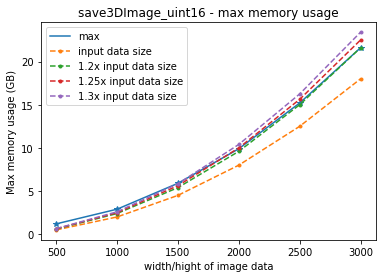

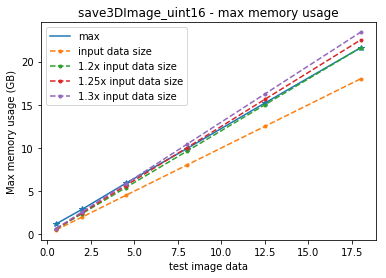

In [74]:
fig = df2.plot(x='test values', y='max', style='*-')
fig = df2.plot(x='test values', 
              y=['input data size','1.2x input data size','1.25x input data size','1.3x input data size'],
              style='.--', ax=fig)

fig.set_title('save3DImage_uint16 - max memory usage')
fig.set_xlabel('width/hight of image data')
fig.set_ylabel('Max memory usage (GB)')

fig = df2.plot(x='x', y='max', style='*-')
fig = df2.plot(x='x', 
              y=['input data size','1.2x input data size','1.25x input data size','1.3x input data size'],
              style='.--', ax=fig)

fig.set_title('save3DImage_uint16 - max memory usage')
fig.set_xlabel('test image data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in phaseOnlyCorrelation

In [47]:
test_values['phaseOnlyCorrelation'] = ['500','1000','1500','2000','2500','3000']
dataframes['phaseOnlyCorrelation'] = \
    create_df(log_dir+'top-phaseOnlyCorrelation-xy-', test_values['phaseOnlyCorrelation'], '-z-250')

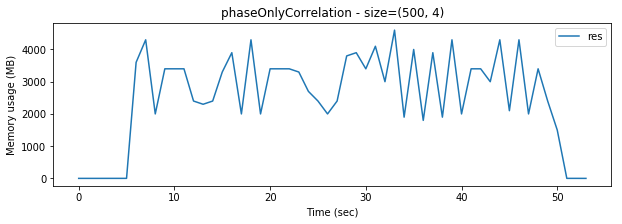

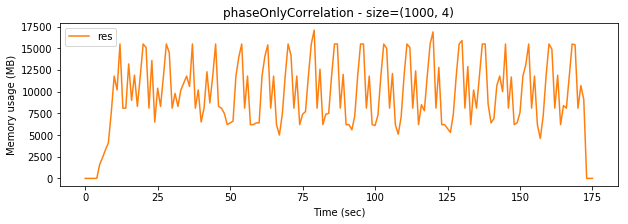

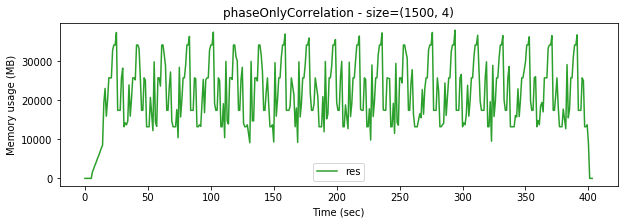

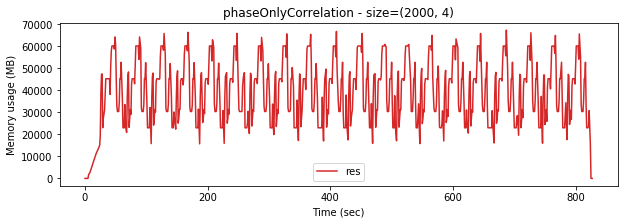

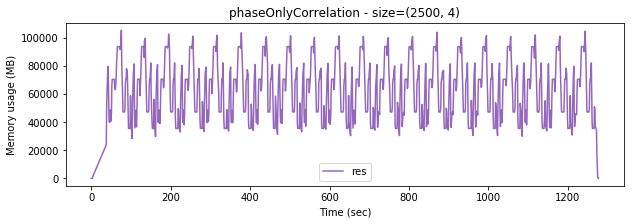

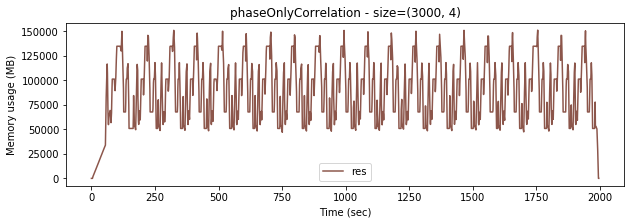

In [48]:
for i in range(0, len(dataframes['phaseOnlyCorrelation'])):
    fig = dataframes['phaseOnlyCorrelation'][i].plot(x='elapsed_time', y='res', figsize=(10,3), color=cmap.colors[i])
    fig.set_title('phaseOnlyCorrelation - size=(%s, 4)' % test_values['phaseOnlyCorrelation'][i])
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [71]:
max_list = [col['res'].max()/1000 for col in dataframes['phaseOnlyCorrelation']]
df3 = pd.DataFrame({'test values': test_values['phaseOnlyCorrelation'], 'max': max_list})
df3['test values'] = pd.to_numeric(df3['test values'])
df3['input data size'] = df3['test values']**2*250*8/10**9
df3['x'] = df3['input data size']
df3['7x input data size'] = df3['input data size']*7
df3['8x input data size'] = df3['input data size']*8
df3['8.5x input data size'] = df3['input data size']*8.5
df3['9x input data size'] = df3['input data size']*9

Text(0,0.5,'Max memory usage (GB)')

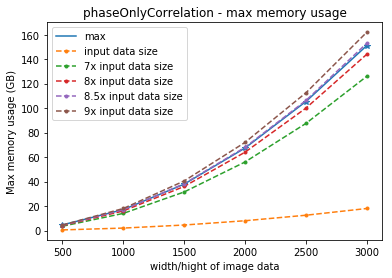

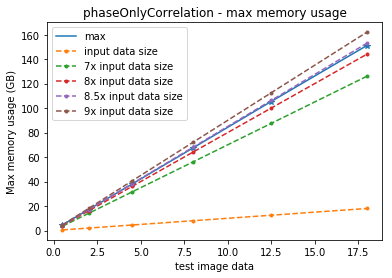

In [73]:
fig = df3.plot(x='test values', y='max', style='*-')
fig = df3.plot(x='test values', 
              y=['input data size','7x input data size','8x input data size','8.5x input data size','9x input data size'],
              style='.--', ax=fig)

fig.set_title('phaseOnlyCorrelation - max memory usage')
fig.set_xlabel('width/hight of image data')
fig.set_ylabel('Max memory usage (GB)')

fig = df3.plot(x='x', y='max', style='*-')
fig = df3.plot(x='x', 
              y=['input data size','7x input data size','8x input data size','8.5x input data size','9x input data size'],
              style='.--', ax=fig)

fig.set_title('phaseOnlyCorrelation - max memory usage')
fig.set_xlabel('test image data')
fig.set_ylabel('Max memory usage (GB)')